In [19]:
from fidlib.basicfunctions import create_heisenberg
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import state_fidelity,Statevector,SparsePauliOp
from qiskit.algorithms import SciPyRealEvolver,TimeEvolutionProblem
import plotly.express as px
import numpy as np

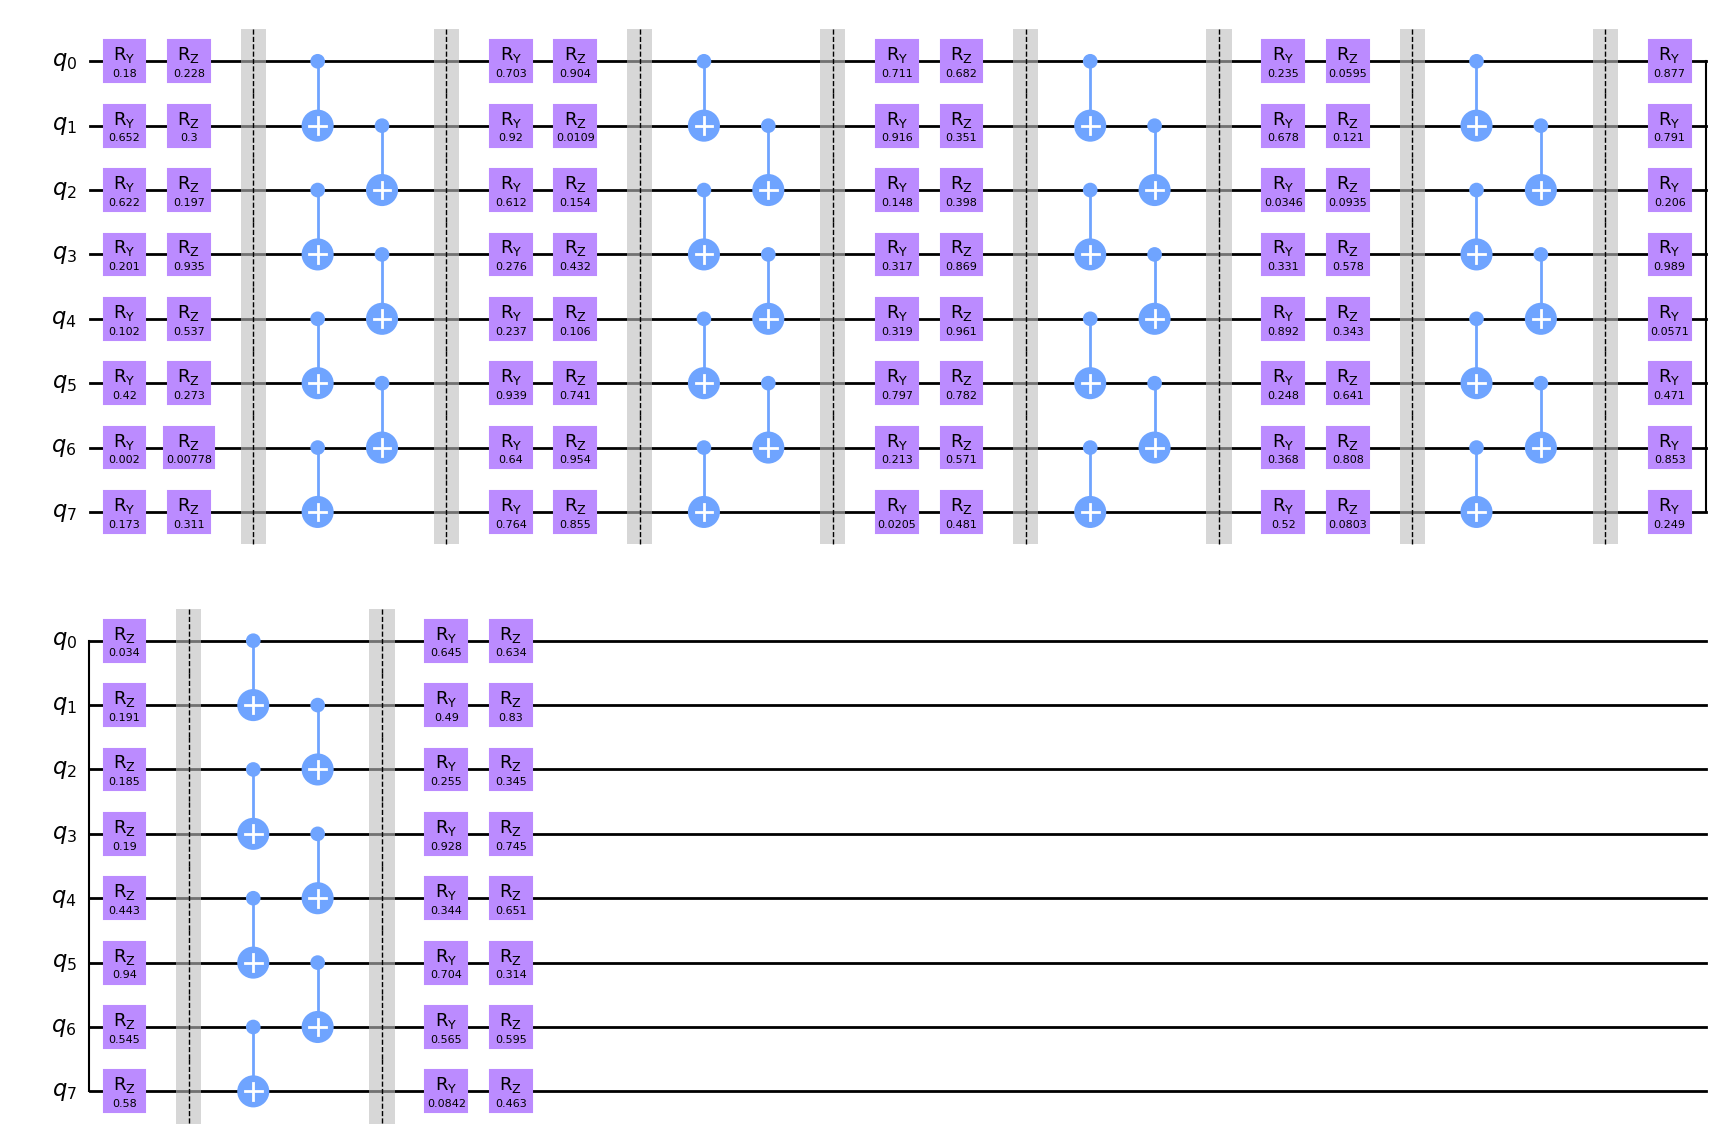

In [20]:
num_qubits=8
qc = EfficientSU2(num_qubits=num_qubits,insert_barriers=True,entanglement="pairwise",reps=5,su2_gates=["ry","rz"])
initial_parameters = np.random.rand(qc.num_parameters)
display(qc.decompose().assign_parameters(initial_parameters).draw(output='mpl'))

In [21]:
initial_state = Statevector(qc.assign_parameters(initial_parameters))
# display(initial_state,output="mpl")

In [25]:
H = create_heisenberg(num_qubits=num_qubits,j_const=4.0,g_const=-1.0)
display(H)


SparsePauliOp(['XXIIIIII', 'IXXIIIII', 'IIXXIIII', 'IIIXXIII', 'IIIIXXII', 'IIIIIXXI', 'IIIIIIXX', 'YYIIIIII', 'IYYIIIII', 'IIYYIIII', 'IIIYYIII', 'IIIIYYII', 'IIIIIYYI', 'IIIIIIYY', 'ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ', 'ZIIIIIII', 'IZIIIIII', 'IIZIIIII', 'IIIZIIII', 'IIIIZIII', 'IIIIIZII', 'IIIIIIZI', 'IIIIIIIZ'],
              coeffs=[ 4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,
  4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,
  4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,  4.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
 -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j])

In [23]:
prob=TimeEvolutionProblem(hamiltonian=H,
                          time=1e-1,
                          initial_state=initial_state,
                          )
solver = SciPyRealEvolver(1)
solution = solver.evolve(prob)
evolved_state=solution.evolved_state
print(f"We start with a state infidelity of {1-state_fidelity(evolved_state,initial_state):.2e} between our previous state and our time-stepped evolved state")

We start with a state infidelity of 9.73e-01 between our previous state and our time-stepped evolved state


In [24]:
parameter_perturbation = np.random.rand(qc.num_parameters); parameter_perturbation /= np.linalg.norm(parameter_perturbation)
# parameter_perturbation = np.zeros(qc.num_parameters); parameter_perturbation[1]=1
eps = 2*np.pi
def perturbed_fidelity(pertsize:float)->float:
    pert_state = Statevector(qc.assign_parameters(initial_parameters+pertsize*parameter_perturbation))
    return state_fidelity(pert_state,evolved_state)
epsilons =np.linspace(-eps,eps,100)
infidelities = 1-np.vectorize(perturbed_fidelity)(epsilons)
df = {"Epsilon":epsilons,"Infidelity":infidelities}
fig = px.line(data_frame=df,x="Epsilon",y="Infidelity")
fig.show()